# Assignment 06: Due 10/12

In this assignment we will look at some real data from the CMS experiment at the LHC. The LHC makes a lot of its data publically available here: http://opendata.cern.ch. The information about the data set we will be working with at can be found here: http://opendata.cern.ch/record/545

## Imports 

For this assignemnt you will need the following imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit #simpliest scipy fitting method
%matplotlib notebook

# Problem 1

Create a Pandas DataFrame object from the data file *Zee_Run2011A.csv*, located in the *data* dircetroy, and use the *info* function to list the information from the DataFrame.

In [2]:
data = pd.read_csv('Data/Zee_Run2011A.csv')
pd.DataFrame.info(data)
pd.set_option('display.max_columns', None)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 22 columns):
Run             18885 non-null int64
Event           18885 non-null int64
pt1             18885 non-null float64
eta1            18885 non-null float64
phi1            18885 non-null float64
Q1              18885 non-null int64
type1           18885 non-null object
sigmaEtaEta1    18885 non-null float64
HoverE1         18885 non-null float64
isoTrack1       18885 non-null float64
isoEcal1        18885 non-null float64
isoHcal1        18885 non-null float64
pt2             18885 non-null float64
eta2            18885 non-null float64
phi2            18885 non-null float64
Q2              18885 non-null int64
type2           18885 non-null object
sigmaEtaEta2    18885 non-null float64
HoverE2         18885 non-null float64
isoTrack2       18885 non-null float64
isoEcal2        18885 non-null float64
isoHcal2        18885 non-null float64
dtypes: float64(16), int64(4), object(2)
me

,Run,Event,pt1,eta1,phi1,Q1,type1,sigmaEtaEta1,HoverE1,isoTrack1,isoEcal1,isoHcal1,pt2,eta2,phi2,Q2,type2,sigmaEtaEta2,HoverE2,isoTrack2,isoEcal2,isoHcal2
0,163286,109060857,37.5667,2.289180,2.052600,-1,EE,0.025125,0.008973,0.00000,0.532876,0.642256,45.4315,1.47064,-1.16305,1,EB,0.000753,0.000000,0.000000,1.019030,0.000000
1,163286,109275715,36.2901,-0.837253,-1.585920,1,EB,0.007829,0.043751,0.00000,1.496990,0.640182,60.5754,-0.48957,1.04960,-1,EB,0.011246,0.000000,0.718473,1.846060,0.000000
2,163286,109075352,25.9705,-0.697420,1.635990,-1,EB,0.009715,0.040728,6.28701,5.007680,3.924910,45.2954,-2.04009,3.11875,1,EE,0.025972,0.028008,15.217000,4.533720,3.836990
3,163286,109169766,41.0075,1.461920,-0.532464,1,EB,0.008753,0.000000,0.00000,1.967000,0.542906,45.9013,1.15606,2.47858,-1,EB,0.008590,0.000000,0.000000,2.438830,0.567555
4,163286,108947653,39.8985,-0.592666,-2.394720,1,EB,0.015261,0.000000,2.54347,4.869100,0.000000,34.8931,-2.24444,0.61061,-1,EE,0.029025,0.000000,12.422900,0.453359,0.909608


# Problem 2

Create a new DataFrame column, which lists the value of the reconstructed invariant mass, $m_{inv}$, from the $Z\rightarrow ee$ decay. The invariant mass is given by

$m_{inv} = \sqrt{2 p_{T1} p_{T2} \left(cosh\left(\eta_1 - \eta_2\right) - cos\left(\phi_1 -\phi_2\right) \right)}$

Make a histogram of the invariant mass.

      Run      Event      pt1      eta1      phi1  Q1 type1  sigmaEtaEta1  \
0  163286  109060857  37.5667  2.289180  2.052600  -1    EE      0.025125   
1  163286  109275715  36.2901 -0.837253 -1.585920   1    EB      0.007829   
2  163286  109075352  25.9705 -0.697420  1.635990  -1    EB      0.009715   
3  163286  109169766  41.0075  1.461920 -0.532464   1    EB      0.008753   
4  163286  108947653  39.8985 -0.592666 -2.394720   1    EB      0.015261   

    HoverE1  isoTrack1  isoEcal1  isoHcal1      pt2     eta2     phi2  Q2  \
0  0.008973    0.00000  0.532876  0.642256  45.4315  1.47064 -1.16305   1   
1  0.043751    0.00000  1.496990  0.640182  60.5754 -0.48957  1.04960  -1   
2  0.040728    6.28701  5.007680  3.924910  45.2954 -2.04009  3.11875   1   
3  0.000000    0.00000  1.967000  0.542906  45.9013  1.15606  2.47858  -1   
4  0.000000    2.54347  4.869100  0.000000  34.8931 -2.24444  0.61061  -1   

  type2  sigmaEtaEta2   HoverE2  isoTrack2  isoEcal2  isoHcal2        minv

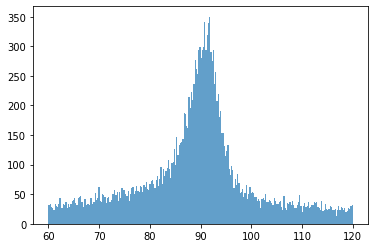

In [3]:
data['minv'] = np.sqrt(2*data['pt1']*data['pt2']*(np.cosh(data['eta1']-data['eta2']) - np.cos(data['phi1']-data['phi2'])))
print(data.head())

fig = plt.figure('Reconstructed Invarient Mass')
plt.hist(data['minv'], bins = 250, alpha = 0.7);

# Problem 3

The Relativistic Breit-Wigner distribution is expected to describe the , which is given as

Wikepedia: https://en.wikipedia.org/wiki/Relativistic_Breit%E2%80%93Wigner_distribution

$f(E) = \frac{k}{(E^2 -M^2)^2 + M^2\Gamma^2}$, where

 * $\gamma$ = $\sqrt{M^2(M^2+\Gamma^2)}$
 * $k = \frac{2\sqrt{2}M\Gamma\gamma}{\pi\sqrt{M^2+\gamma}}$
 
 Where $E$ is the energy, $M$ is the mass value where the function will peak. 
 Fit the invariant mass distribution with the function:
 
 $aE + b + cf(E)$,
 
 where $a, b, $ and $c$ are fit parameters to be deterimined by your fit that describe a linear background, and $f(E)$ is the Relativistic Breit-Wigner function described above. To do this you should make a function that takes as agruments: $\Gamma, M, a, b, c$. Where $\Gamma$ and $M$ are contained in the Breit-Wigner function ($f(E)$). Our fit will determine the values $\Gamma, M, a, b, c$. The value of $M = m_{inv}$ and should be near where the distribution peaks.   
 
 Fit the distribution and calculate the reduced $\chi^2$. You can use either the *curve_fit* function form Scipy or the MC fitting approach.
 
 What is your best invariant mass value according to your fit? How does this compare to the accepted value of the $Z$ boson mass (you can look it up on Wikipedia)?
 
According to my fit the best invariant mass value is 90.6 which is very close to the accepted value of 91.2 for the Z boson mass.

Reduced Chi Squared:  1.4869818764943346


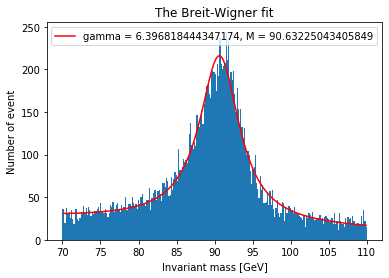

In [4]:
def breitwigner_rel(E, gamma, M, a, b, A):
    little_gamma = np.sqrt(M**2*(M**2 + gamma**2))
    k = 2*np.sqrt(2)*M*gamma*little_gamma/(np.pi*np.sqrt(M**2 + little_gamma))
    return a*E + b + A*(k/((E**2 - M**2)**2 + M**2 * gamma**2))

# Let's limit the fit near to the peak of the histogram.
lowerlimit = 70
upperlimit = 110
bins = 250

## Need to go over this with class
fig = plt.figure()
histogram_mu = plt.hist(data['minv'], bins=bins, range=(lowerlimit,upperlimit))

#print(histogram_mu[0][:]) #bins counts
#print(histogram_mu[1][:]) #mass values

y_mu = histogram_mu[0]; #bin counts
x_mu = 0.5*( histogram_mu[1][0:-1] + histogram_mu[1][1:] ) #bin center
y_mu_error = np.sqrt(y_mu)
for i in range (len(y_mu)):
    if y_mu_error[i] == 0:
        y_mu_error[i] = 1.0
    else:
        y_mu_error[i] = y_mu_error[i]

initials = [2.5,91,-2, 200, 13000]
best_mu, covariance_mu = curve_fit(breitwigner_rel, x_mu, y_mu, p0=initials, sigma=y_mu_error)
error_mu = np.sqrt(np.diag(covariance_mu))      

plt.plot(x_mu, breitwigner_rel(x_mu, *best_mu), 'r-', label='gamma = {}, M = {}'.format(best_mu[0], best_mu[1]))
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of event')
plt.title('The Breit-Wigner fit')
plt.legend();

chisq = np.sum((y_mu - breitwigner_rel(x_mu, *best_mu))**2/y_mu_error**2)
dof = len(y_mu) - len(best_mu) - 1
rchisq = chisq/dof
print('Reduced Chi Squared: ', rchisq)

# Problem 4

On the same graph, make histograms of the $\eta_1$ and $\eta_2$ distributions. Be sure to include a legend so the two distributions can be distinquised.

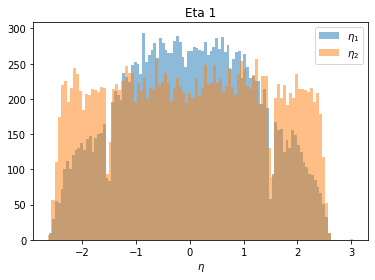

In [5]:
fig = plt.figure('eta')
plt.hist(data['eta1'],bins = 100,alpha = 0.5, label =r'$\eta_1$')
plt.hist(data['eta2'],bins = 100,alpha = 0.5, label = r'$\eta_2$')
plt.xlabel(r'$\eta$')
plt.title('Eta 1')
plt.legend();

# Problem 5

From the distribution above, we clearly see two distinct distributions in the histogram. We can explain this due to the decay being detected in two different detectors, the electromagnetic barrel calorimeter (EB) and the endcap electromagnetic calorimeter (EE). This distinction is made in the column labeled *type1* and *type2*, which tells us which detector particle 1 and particle 2 are detected in. 

Create two DataFrames *barrel* and *endcap*, where *barrel* keeps all of the information in the original DataFrame where both particles were detected in the EB, and *endcap* keeps all of the information in the original DataFrame where both particles were detected in the EE.

Make two sub plots where in sub plot one you histogram the $\eta1$ distribution for the particles in the EB and EE. Then in sub plot two histogram the $\eta2$ distribution for particles detected in the EE and EB. Be sure to include a legend that distiquishes EB from EE events.

Based on the information above, does our assumption that the $\eta$ distribution looks the way it does is because of the two different detectors make sense? Based on your histograms, what is the rough $\eta$ ranges covered by the EB and EE detectors?

Our assumption does make sense since we see that the two separate distributions are created by the two different detectors, with the endcap detector providing the outermost distribution and the inner distribution being created by the barrel detector.

The EB detector covers roughly the range of -1.5 - 1.5 and the EE detector covers roughly the range of -2.5 - -1.5 and 1.5 - 2.5 based on the histograms.

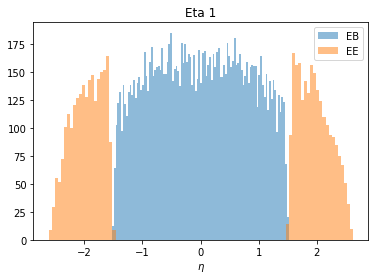

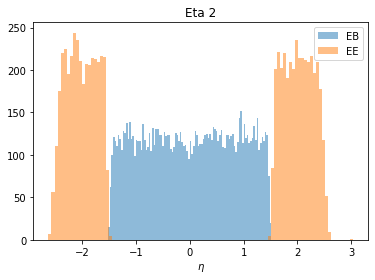

In [6]:
EB = 'EB'
EE = 'EE'
barrel = data.loc[data['type1'] == 'EB']
barrel = barrel.loc[barrel['type2'] == 'EB']
endcap = data.loc[data['type1'] == 'EE']
endcap = endcap.loc[endcap['type2'] == 'EE']
barrel.head()
endcap.head()

EB1 = data.loc[data['type1'] == 'EB']
EB2 = data.loc[data['type2'] == 'EB']
EE1 = data.loc[data['type1'] == 'EE']
EE2 = data.loc[data['type2'] == 'EE']

fig = plt.figure('eta')
plt.hist(EB1['eta1'],bins = 100,alpha = 0.5, label ='EB')
plt.hist(EE1['eta1'],bins = 100,alpha = 0.5, label = 'EE')
plt.xlabel(r'$\eta$')
plt.title('Eta 1')
plt.legend();


fig2 = plt.figure('eta2')
plt.hist(EB2['eta2'],bins = 100,alpha = 0.5, label ='EB')
plt.hist(EE2['eta2'],bins = 100,alpha = 0.5, label = 'EE')
plt.xlabel(r'$\eta$')
plt.title('Eta 2')
plt.legend();

# Problem 6

With particles being detected in two different detectors, the resolution of the detectors could differ. This could reslt in measureing the boson mass better in one detector than the other.

Using your *barrel* and *endcap* DataFrames from above, on the same graph make a histogram of the invariant mass measured in the barrel and endcap detectors.  

Use the *std* function to get the standard deviation of the two invariant mass distributions. The standard deviation is reflective of how narrow our mass peak is. Which detector gives the better resolution and hence the narrower invariant mass distribution? Does your histogram support the same conclusion?

The std function shows that the barrel detector gives the better resolution and hence the narrower invariant mass distribution which is supported by the histogram.

Barrel std:  11.488508465840878
Endcap std:  12.22664364645296


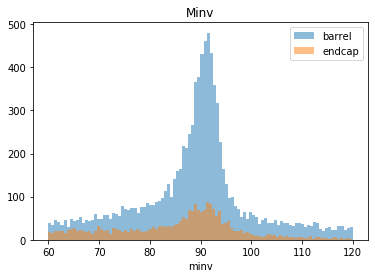

In [7]:
fig = plt.figure('minv')
plt.hist(barrel['minv'],bins = 100,alpha = 0.5, label = 'barrel')
plt.hist(endcap['minv'],bins = 100,alpha = 0.5, label = 'endcap')
plt.xlabel('minv')
plt.title('Minv')
plt.legend();

print('Barrel std: ', np.std(barrel['minv']))
print('Endcap std: ', np.std(endcap['minv']))

# Problem 7
From your DataFrame (from Problem 2), drop all columns except for pt1, eta1, phi1, pt2, eta2, phi2, and M. 
Using this DataFrame, use the Pandas *corr* function to produce a correlataion table. What quantites have the strongest correlation (that is not 1)? Eta1 and eta2 have the strongest positive correlation and phi1 and phi2 have the strongest negative correlation.

In [8]:
data = data.drop(['Run', 'Event', 'Q1', 'type1', 'sigmaEtaEta1', 'HoverE1', 'isoTrack1', 'isoEcal1', 'isoHcal1', 'Q2', 'type2', 'sigmaEtaEta2', 'HoverE2', 'isoTrack2', 'isoEcal2', 'isoHcal2'], axis = 1)
data.head()

,pt1,eta1,phi1,pt2,eta2,phi2,minv
0,37.5667,2.289180,2.052600,45.4315,1.47064,-1.16305,89.589562
1,36.2901,-0.837253,-1.585920,60.5754,-0.48957,1.04960,92.252290
2,25.9705,-0.697420,1.635990,45.2954,-2.04009,3.11875,67.859158
3,41.0075,1.461920,-0.532464,45.9013,1.15606,2.47858,87.604923
4,39.8985,-0.592666,-2.394720,34.8931,-2.24444,0.61061,101.426755


In [9]:
data.corr()

,pt1,eta1,phi1,pt2,eta2,phi2,minv
pt1,1.000000,-0.005495,-0.000376,-0.068503,-0.009661,-0.000184,0.279797
eta1,-0.005495,1.000000,0.015935,0.009975,0.665429,-0.022004,0.010426
phi1,-0.000376,0.015935,1.000000,0.000893,0.007323,-0.460515,-0.000727
pt2,-0.068503,0.009975,0.000893,1.000000,0.010027,-0.000399,0.342749
eta2,-0.009661,0.665429,0.007323,0.010027,1.000000,-0.023955,0.002616
phi2,-0.000184,-0.022004,-0.460515,-0.000399,-0.023955,1.000000,-0.015139
minv,0.279797,0.010426,-0.000727,0.342749,0.002616,-0.015139,1.000000
